Transformation Basics

Grouping crimes by location type or by zip code (or groups of zip codes).
Or, on the contrary, looking at types of crimes and where they are most common.
Would be good to know which areas have the fastest growing and shrinking crime rates.
Might even be worth grouping crimes by violent and non-violent?

In [4]:
# importing required packages
import pandas as pd
import numpy as np
import csv

In [ ]:
# set working directory
import os
os.chdir('/Users/kyliewise/Desktop')

In [7]:
# reading in data
df = pd.read_csv('crimestat2.csv', quoting=csv.QUOTE_NONE)

# strip quotes, transform date to datetime, transform zip to int
df['"OCCURRED ON"'] = pd.to_datetime(df['"OCCURRED ON"'])
df['"ZIP"'] = pd.to_numeric(df['"ZIP"'].str.strip('"'))

# check to make sure it looks good
df.head()

,"""INC NUMBER""","""OCCURRED ON""","""OCCURRED TO""","""UCR CRIME CATEGORY""","""100 BLOCK ADDR""","""ZIP""","""PREMISE TYPE"""
0,"""201600000052855""",2015-11-01,01/09/2016 00:00,"""MOTOR VEHICLE THEFT""","""N 43RD AVE & W CACTUS RD""",85029.0,"""SINGLE FAMILY HOUSE"""
1,"""201600000594484""",2015-11-01,NaN,"""RAPE""","""13XX E ALMERIA RD""",85006.0,"""SINGLE FAMILY HOUSE"""
2,"""201500002102327""",2015-11-01,11/01/2015 09:00,"""LARCENY-THEFT""","""51XX N 15TH ST""",85014.0,"""APARTMENT"""
3,"""201500002101405""",2015-11-01,11/01/2015 05:00,"""MOTOR VEHICLE THEFT""","""102XX W MEDLOCK AVE""",85307.0,"""SINGLE FAMILY HOUSE"""
4,"""201500002102668""",2015-11-01,11/01/2015 11:50,"""MOTOR VEHICLE THEFT""","""69XX W WOOD ST""",85043.0,"""SINGLE FAMILY HOUSE"""


In [12]:
# grouping crimes by location type or by zip code
location_type_counts = df.groupby('"PREMISE TYPE"').count()['"INC NUMBER"'].sort_values(ascending = False)
pd.DataFrame(location_type_counts)

,"""INC NUMBER"""
"""PREMISE TYPE""",
"""SINGLE FAMILY HOUSE""",25329
"""APARTMENT""",14957
"""PARKING LOT""",14148
"""STREET / ROADWAY / ALLEY / SIDEWALK""",11596
"""RETAIL BUSINESS""",10852
...,...
"""GAMBLING FACILITY/CASINO/RACE TRACK""",2
"""LAKE / WATERWAY / BEACH""",1
"""TRIBAL LANDS""",1


We can see from above that single family homes are the most frequent places for crime to occur in Pheonix according to this data

In [13]:
zip_code_counts = df.groupby('"ZIP"').count()['"INC NUMBER"'].sort_values(ascending = False)
pd.DataFrame(zip_code_counts)

,"""INC NUMBER"""
"""ZIP""",
85015.0,6963
85008.0,6320
85009.0,5513
85041.0,5477
85051.0,5389
...,...
85248.0,1
85233.0,1
85226.0,1


We can see from the above dataframe that zip code "85015" is the most crime-ridden zip with 6,963 crimes.

In [15]:
# look at unique zip codes
zip_codes = df['"ZIP"'].sort_values(ascending = False)

In [18]:
# create a grouped zip code column to look at groups of zips
df.loc[df['"ZIP"'].between(85000, 85050, 'both'), 'ZIP_GROUP'] = '85000-85050'
df.loc[df['"ZIP"'].between(85050, 85200, 'right'), 'ZIP_GROUP'] = '85050-85100'
df.loc[df['"ZIP"'].between(85100, 85400, 'right'), 'ZIP_GROUP'] = '85100+'

zip_code_counts_grouped = df.groupby('ZIP_GROUP').count()['"INC NUMBER"'].sort_values(ascending = False)
pd.DataFrame(zip_code_counts_grouped)

,"""INC NUMBER"""
ZIP_GROUP,
85000-85050,112697
85050-85100,10669
85100+,8308


In [21]:
# looking at types of crimes and where they are most common
most_common = df.groupby(['"UCR CRIME CATEGORY"','"ZIP"']).count()['"INC NUMBER"'].sort_values(ascending = False)

pd.DataFrame(most_common)

"INC NUMBER"
"UCR CRIME CATEGORY"  "ZIP"                
"LARCENY-THEFT"       85015.0          3636
                      85008.0          3196
                      85051.0          2598
                      85041.0          2548
                      85032.0          2533
...                                     ...
"MOTOR VEHICLE THEFT" 85396.0             1
"LARCENY-THEFT"       85257.0             1
                      85266.0             1
                      85268.0             1
"MOTOR VEHICLE THEFT" 85257.0             1

[561 rows x 1 columns]

<AxesSubplot:xlabel='"OCCURRED ON"'>

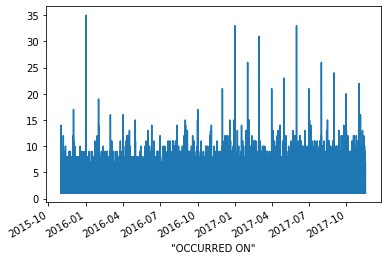

In [23]:
# change in crime over time
df.groupby('"OCCURRED ON"').count()['"INC NUMBER"'].plot.line()

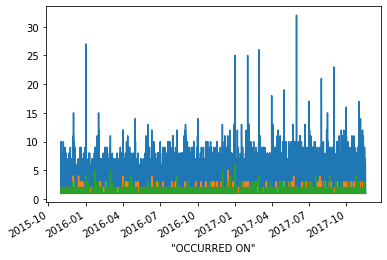

In [24]:
# changes in crime over time by zip group
subset1 = df[df['ZIP_GROUP'] == '85000-85050']
subset2 = df[df['ZIP_GROUP'] == '85050-85100']
subset3 = df[df['ZIP_GROUP'] == '85100+']

subset_list = [subset1, subset2, subset3]

for df in subset_list:
    df.groupby('"OCCURRED ON"').count()['"INC NUMBER"'].plot.line()

<AxesSubplot:xlabel='"OCCURRED ON"'>

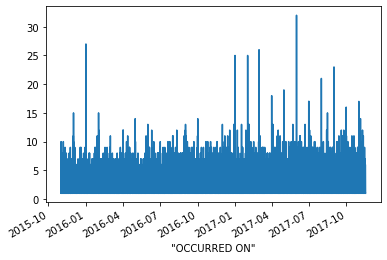

In [25]:
subset1.groupby('"OCCURRED ON"').count()['"INC NUMBER"'].plot.line()

<AxesSubplot:xlabel='"OCCURRED ON"'>

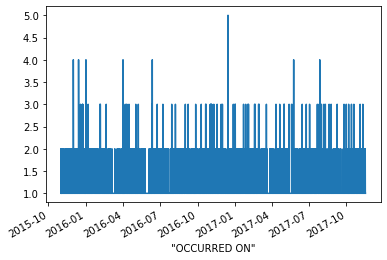

In [26]:
subset2.groupby('"OCCURRED ON"').count()['"INC NUMBER"'].plot.line()

<AxesSubplot:xlabel='"OCCURRED ON"'>

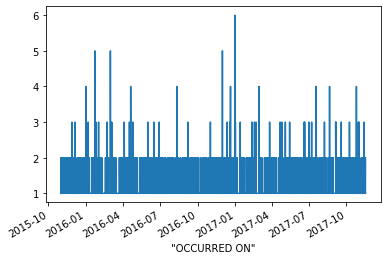

In [27]:
subset3.groupby('"OCCURRED ON"').count()['"INC NUMBER"'].plot.line()

Ideally I would have population count for each of these zip codes to calculate a true crime rate per capita. However, we do see some useful information from these graphs. For example, we see that there may be a cyclical pattern to crime, which makes sense. For example, in the first graph, which looks at crime for zip codes 85000-85050 we see that crime is peaking in January of both of these years. This is interesting because we saw earlier that the most frequent type of crime happens in single family homes. According to the Bureau of Justice (https://bjs.ojp.gov/content/pub/pdf/ics.pdf) crimes against property peak in the winter and crimes against people occur more frequently in the summer. We also see a general upward trend of crimes for zip codes 85000-85050, which is something constituents and leadership should definitely keep an eye on and continue to explore. 